In [143]:
# converts CMYK color tuple to RGB color tuple
def cmyk_to_rgb(color, rgb_scale=255):
    cmyk_scale = 1
    c, m, y, k = color
    r = rgb_scale * (1.0 - c / float(cmyk_scale)) * (1.0 - k / float(cmyk_scale))
    g = rgb_scale * (1.0 - m / float(cmyk_scale)) * (1.0 - k / float(cmyk_scale))
    b = rgb_scale * (1.0 - y / float(cmyk_scale)) * (1.0 - k / float(cmyk_scale))
    r, g, b = int(r), int(g), int(b)
    return [r, g, b]

In [144]:
maxIsc = 5.11

In [145]:
import matplotlib.pyplot as plt

raster = plt.imread('image/copper1.tif')

In [146]:
from PIL import Image
im = Image.fromarray(raster)

In [147]:
width, length = im.size
resize_i = 1
while width//resize_i > 2000:
    resize_i = resize_i * 2
im = im.resize((width//resize_i, length//resize_i), Image.NEAREST)

In [148]:
import numpy
im_array = numpy.array(im)

In [149]:
def pixel_to_Isc(rgb, rgb_deltas=[0.00310452, 0.00259068, 0.00117855], intercept=3.166434582014097):
    return rgb[0]*rgb_deltas[0] + rgb[1]*rgb_deltas[1] + rgb[2]*rgb_deltas[2] + intercept

    

In [133]:
print(pixel_to_Isc(numpy.array([255, 255, 255])))
print(im_array.shape)

4.919240832014097
(2840, 1417, 3)


In [134]:
Isc_array = numpy.zeros((im_array.shape[0], im_array.shape[1]))

In [135]:
for y in range(im_array.shape[0]):
    for x in range(im_array.shape[1]):
        Isc = pixel_to_Isc(im_array[y,x,:])
        Isc_array[y,x] = Isc
        
efficiency = Isc_array/5.8

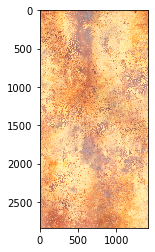

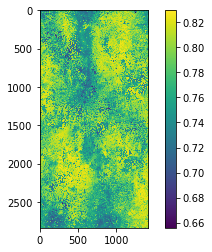

In [136]:
plt.imshow(im_array)
plt.show()
plt.imshow(efficiency, cmap='viridis')
plt.colorbar()
plt.show()


(2840, 1417)


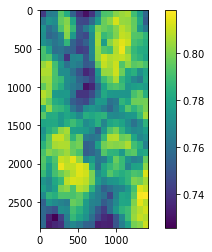

In [141]:
print(efficiency.shape)
efficiency_copy = numpy.copy(efficiency)
split = numpy.array_split(efficiency_copy, 30, axis=0)
efficiency_list = []
efficiency_coor = []
for i, h_split in enumerate(split):
    for j, array_block in enumerate(numpy.array_split(h_split, 18, axis=1)):
        array_block.fill(numpy.average(array_block))
        efficiency_list.append(numpy.average(array_block))
        effiency_coor.append([])
        
plt.imshow(efficiency_copy, cmap='viridis')
plt.colorbar()
plt.show()

In [142]:
import numpy as np

min_efficiency = min(efficiency_list)
print(min_efficiency)
print(np.average(efficiency_list))
print(max(efficiency_list) - min(efficiency_list))
print()
sorted_eff = efficiency_list.copy()
sorted_eff.sort()

for i in range(0, 5):
    print(i, sorted_eff[i])

for i in range(5, len(sorted_eff), 5):
    print(i, sorted_eff[i])

0.7258278401972261
0.780803356875524
0.09233484378341983

0 0.7258278401972261
1 0.7300419836721678
2 0.7307299024493049
3 0.7321909713617275
4 0.7330503486767527
5 0.7339687166487894
10 0.7360452952925576
15 0.739233964613839
20 0.7417573186695262
25 0.7448307368351165
30 0.746347515063725
35 0.7492136125167554
40 0.7506545609797517
45 0.752556525906802
50 0.7541387884811462
55 0.7545021980912056
60 0.7556458720808154
65 0.7563923979320866
70 0.7574118018394526
75 0.7591003668215628
80 0.7597197914986745
85 0.7603555989780558
90 0.7614242213073077
95 0.7623406555164216
100 0.763263083639776
105 0.7639322496179938
110 0.7646546403102956
115 0.7653943599658395
120 0.7658868975116941
125 0.7665423854944016
130 0.7670727708478505
135 0.7679828303938324
140 0.7686006064912084
145 0.7690191702607023
150 0.7694065363128882
155 0.7699356688802316
160 0.7704660071859173
165 0.770834311344984
170 0.77128610598472
175 0.7713640615372058
180 0.7724991575558299
185 0.7730472129138231
190 0.7738570